# 课程练习1

**机器学习**（Machine Learning，ML）就是让计算机从数据中进行自动学习，得到某种知识（或规律）。作为一门学科，机器学习通常指一类问题以及解决这类问题的方法，即如何从观测数据（样本）中寻找规律，并利用学习到的规律（模型）对未知或无法观测的数据进行预测。

本节主要包含两部分：

* **模型解读**：介绍机器学习实践五要素（数据、模型、学习准则、优化算法、评估指标）的原理剖析和相应的代码实现。通过理论和代码的结合，加深对机器学习的理解；
* **案例实践**：基于机器学习线性回归方法，通过数据处理、模型构建、训练配置、组装训练框架Runner、模型训练和模型预测等过程完成波士顿房价预测任务。


## 1. 机器学习实践五要素

机器学习5要素：
1. 数据集：收集任务相关的数据集用来进行模型训练和测试，可分为训练集、验证集和测试集；
1. 模型：实现输入到输出的映射，通常为可学习的函数；
1. 学习准则：模型优化的目标，通常为损失函数和正则化项的加权组合；
1. 优化算法：根据学习准则优化机器学习模型的参数；
1. 评价指标：用来评价学习到的机器学习模型的性能．

实现一个完整的机器学习可以分为两个阶段：训练阶段和评价阶段。训练阶段需要用到训练集、验证集、待学习的模型、损失函数、优化算法，输出学习到的模型；评价阶段也称为测试阶段，需要用到测试集、学习到的模型、评价指标体系，得到模型的性能评价。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/c6659949ce3b4c4683a3f82d7b9683b0d341ee57b87f4fb084be58e31dbe7f92" width=500></center>

<br><center>图2.1 机器学习系统示例</center></br>

<br>

### 1.1 数据

在实践中，数据的质量会很大程度上影响模型最终的性能，通常数据预处理是完成机器学习实践的第一步，噪音越少、规模越大、覆盖范围越广的数据集往往能够训练出性能更好的模型。数据预处理可分为两个环节：先对收集到的数据进行基本的预处理，如基本的统计、特征归一化和异常值处理等；再将数据划分为训练集、验证集（开发集）和测试集。
* **训练集**：用于模型训练时调整模型的参数，在这份数据集上的误差被称为训练误差；
* **验证集（开发集）**：对于复杂的模型，常常有一些超参数需要调节，因此需要尝试多种超参数的组合来分别训练多个模型，然后对比它们在验证集上的表现，选择一组相对最好的超参数，最后才使用这组参数下训练的模型在测试集上评估测试误差。
* **测试集**：模型在这份数据集上的误差被称为测试误差。训练模型的目的是为了通过从训练数据中找到规律来预测未知数据，因此测试误差是更能反映出模型表现的指标。

数据划分时要考虑到两个因素：更多的训练数据会降低参数估计的方差，从而得到更可信的模型；而更多的测试数据会降低测试误差的方差，从而得到更可信的测试误差。如果给定的数据集没有做任何划分，我们一般可以大致按照7:3或者8:2的比例划分训练集和测试集，再根据7:3或者8:2的比例从训练集中再次划分出训练集和验证集。

----
需要强调的是，测试集只能用来评测模型最终的性能，在整个模型训练过程中不能有测试集的参与。


### 1.2 模型

有了数据后，我们可以用数据来训练模型。我们希望能让计算机从一个函数集合 $\mathcal{F} = \{f_1(\boldsymbol{x}), f_2(\boldsymbol{x}), \cdots \}$中
自动寻找一个“最优”的函数$f^∗(\boldsymbol{x})$ 来近似每个样本的特征向量 $\boldsymbol{x}$ 和标签 $y$ 之间
的真实映射关系，实际上这个函数集合也被称为**假设空间**，在实际问题中，假设空间$\mathcal{F}$通常为一个参数化的函数族
$$
\mathcal{F}=\left\{f(\boldsymbol{x} ; \theta) \mid \theta \in \mathbb{R}^{D}\right\}, (2.1)
$$
其中$f(\boldsymbol{x} ; \theta)$是参数为$\theta$的函数，也称为模型，𝐷 为参数的数量。


常见的假设空间可以分为线性和非线性两种，对应的模型 $f$ 也分别称为线性模型和非线性模型。**线性模型**的假设空间为一个参数化的线性函数族，即：
$$
f(\boldsymbol{x} ; \theta)=\boldsymbol{w}^{\top} \boldsymbol{x}+b, (2.2)
$$
其中参数$\theta$ 包含了权重向量$\boldsymbol{w}$和偏置$b$。

线性模型可以由**非线性基函数**$\phi(\boldsymbol{x})$变为**非线性模型**，从而增强模型能力:

$$
f(\boldsymbol{x} ; \theta)=\boldsymbol{w}^{\top} \phi(\boldsymbol{x})+b, (2.3)
$$
其中$\phi(\boldsymbol{x})=\left[\phi_{1}(\boldsymbol{x}), \phi_{2}(\boldsymbol{x}), \cdots, \phi_{K}(\boldsymbol{x})\right]^{\top}$为𝐾 个非线性基函数组成的向量，参数 $\theta$ 包含了权重向量$\boldsymbol{w}$和偏置$b$。


### 1.3 学习准则

为了衡量一个模型的好坏，我们需要定义一个损失函数$\mathcal{L}(\boldsymbol{y},f(\boldsymbol{x};\theta))$。损失函数是一个非负实数函数，用来量化模型预测标签和真实标签之间的差异。常见的损失函数有 0-1 损失、平方损失函数、交叉熵损失函数等。

机器学习的目标就是找到最优的模型$𝑓(𝒙;\theta^∗)$在真实数据分布上损失函数的期望最小。然而在实际中，我们无法获得真实数据分布，通常会用在训练集上的平均损失替代。

一个模型在训练集$\mathcal{D}=\{(\boldsymbol{x}^{(n)},y^{(n)})\}_{n=1}^N$上的平均损失称为**经验风险**{Empirical Risk}，即:

$$
\mathcal{R}^{emp}_\mathcal{D}(\theta)=\frac{1}{N}\sum_{n=1}^{N}\mathcal{L}(y^{(n)},f({x}^{(n)};\theta))。 (2.4)
$$

$\mathcal{L}(\boldsymbol{y},f(\boldsymbol{x};\theta))$为损失函数。损失函数是一个非负实数函数，用来量化模型预测和真实标签之间的差异。常见的损失函数有0-1损失、平方损失函数、交叉熵损失函数等。

在通常情况下，我们可以通过使得**经验风险最小化**来获得具有预测能力的模型。然而，当模型比较复杂或训练数据量比较少时，经验风险最小化获得的模型在测试集上的效果比较差。而模型在测试集上的性能才是我们真正关心的指标．当一个模型在训练集错误率很低，而在测试集上错误率较高时，通常意味着发生了**过拟合**（Overfitting）现象。为了缓解模型的过拟合问题，我们通常会在经验损失上加上一定的正则化项来限制模型能力。

过拟合通常是由于模型复杂度比较高引起的。在实践中，最常用的正则化方式有对模型的参数进行约束，比如$\ell_1$或者$\ell_2$范数约束。这样，我们就得到了结构风险（Structure Risk）。
$$
\mathcal{R}^{struct}_{\mathcal{D}}(\theta)=\mathcal{R}^{emp}_{\mathcal{D}}(\theta)+\lambda \ell_p(\theta), (2.5)
$$

其中$\lambda$为正则化系数，$p=1$或$2$表示$\ell_1$或者$\ell_2$范数。

### 1.4 优化算法
在有了优化目标之后，机器学习问题就转化为优化问题，我们可以利用已知的优化算法来学习最优的参数。当优化函数为凸函数时，我们可以令参数的偏导数等于0来计算最优参数的解析解。当优化函数为非凸函数时，我们可以用一阶的优化算法来进行优化。

目前机器学习中最常用的优化算法是**梯度下降法**(Gradient Descent Method)。
当使用梯度下降法进行参数优化时，还可以利用验证集来**早停法**(Early-Stop)来中止模型的优化过程，避免模型在训练集上过拟合。早停法也是一种常用并且十分有效的正则化方法。

### 1.5 评估指标

**评估指标**(Metric)用于评价模型效果，即给定一个测试集，用模型对测试集中的每个样本进行预测，并根据预测结果计算评价分数。回归任务的评估指标一般有预测值与真实值的均方差，分类任务的评估指标一般有准确率、召回率、F1值等。

****
对于一个机器学习任务，一般会先确定任务类型，再确定任务的评价指标，再根据评价指标来建立模型，选择学习准则。由于评价指标不可微等问题有时候学习准则并不能完全和评价指标一致，我们往往会选择一定的损失函数使得两者尽可能一致。
****

## 2 实现一个简单的线性回归模型
**回归任务**是一类典型的监督机器学习任务，对自变量和因变量之间关系进行建模分析，其预测值通常为一个连续值，比如房屋价格预测、电源票房预测等。**线性回归**(Linear Regression)是指一类利用线性函数来对自变量和因变量之间关系进行建模的回归任务，是机器学习和统计学中最基础和最广泛应用的模型。

在本节中，我们动手实现一个简单的线性回归模型，并使用最小二乘法来求解参数，以对机器学习任务有更直观的认识。

### 2.1 数据集构建

首先，我们构造一个小的回归数据集。假设输入特征和输出标签的维度都为 1，需要被拟合的函数定义为：


In [159]:
# 真实函数的参数缺省值为 w=1.2，b=0.5
def linear_func(x,w=1.2,b=0.5):
    y = w*x + b
    return y

然后，使用`paddle.rand()`函数来进行随机采样输入特征$x$，并代入上面函数得到输出标签$𝑦$。为了模拟真实环境中样本通常包含噪声的问题，我们采样过程中加入高斯噪声和异常点。

生成样本数据的函数`create_toy_data`实现如下：

In [160]:
import paddle

def create_toy_data(func, interval, sample_num, noise = 0.0, add_outlier = False, outlier_ratio = 0.001):
    """
    根据给定的函数，生成样本
    输入：
       - func：函数
       - interval： x的取值范围
       - sample_num： 样本数目
       - noise： 噪声均方差
       - add_outlier：是否生成异常值
       - outlier_ratio：异常值占比
    输出：
       - X: 特征数据，shape=[n_samples,1]
       - y: 标签数据，shape=[n_samples,1]
    """

    # 均匀采样
    # 使用paddle.rand在生成sample_num个随机数
    X = paddle.rand(shape = [sample_num]) * (interval[1]-interval[0]) + interval[0]
    y = func(X)

    # 生成高斯分布的标签噪声
    # 使用paddle.normal生成0均值，noise标准差的数据
    epsilon = paddle.normal(0,noise,paddle.to_tensor(y.shape[0]))
    y = y + epsilon
    if add_outlier:     # 生成额外的异常点
        outlier_num = int(len(y)*outlier_ratio)
        if outlier_num != 0:
            # 使用paddle.randint生成服从均匀分布的、范围在[0, len(y))的随机Tensor
            outlier_idx = paddle.randint(len(y),shape = [outlier_num])
            y[outlier_idx] = y[outlier_idx] * 5
    return X, y

利用上面的生成样本函数，生成 150 个带噪音的样本，其中 100 个训练样本，50 个测试样本，并打印出训练数据的可视化分布。

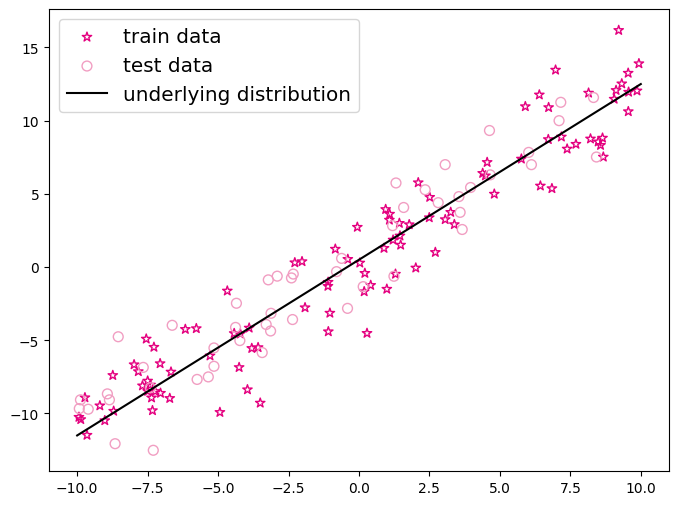

In [161]:
from matplotlib import pyplot as plt # matplotlib 是 Python 的绘图库

func = linear_func
interval = (-10,10)
train_num = 100 # 训练样本数目
test_num = 50 # 测试样本数目
noise = 2
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise = noise, add_outlier = False)
X_test, y_test = create_toy_data(func=func, interval=interval, sample_num=test_num, noise = noise, add_outlier = False)

X_train_large, y_train_large = create_toy_data(func=func, interval=interval, sample_num=5000, noise = noise, add_outlier = False)

# paddle.linspace返回一个Tensor，Tensor的值为在区间start和stop上均匀间隔的num个值，输出Tensor的长度为num
X_underlying = paddle.linspace(interval[0],interval[1],train_num) 
y_underlying = linear_func(X_underlying)

# 绘制数据
plt.scatter(X_train, y_train, marker='*', facecolor="none", edgecolor='#e4007f', s=50, label="train data")
plt.scatter(X_test, y_test, facecolor="none", edgecolor='#f19ec2', s=50, label="test data")
plt.plot(X_underlying.cpu().numpy(), y_underlying.cpu().numpy(), c='#000000', label=r"underlying distribution")

plt.legend(fontsize='x-large') # 给图像加图例
plt.savefig('ml-vis.pdf') # 保存图像到PDF文件中
plt.show()

### 2.2 模型构建

在线性回归中，自变量为样本的特征向量$\boldsymbol{x}\in \mathbb{R}^D$(每一维对应一个自变量)，因变量是连续值的标签$y\in R$。

线性模型定义为：
$$
f(\boldsymbol{x};\boldsymbol{w},b)=\boldsymbol{w}^T\boldsymbol{x}+b。 (2.6)
$$

其中权重向量$\boldsymbol{w}\in \mathbb{R}^D$和偏置$b\in \mathbb{R}$都是可学习的参数。

****
注意：《神经网络与深度学习》中为了表示的简洁性，使用**增广权重向量**来定义模型。而在本书中，为了和代码实现保持一致，我们使用非增广向量的形式来定义模型。
****

在实践中，为了提高预测样本的效率，我们通常会将$N$样本归为一组进行成批地预测，这样可以更好地利用GPU设备的并行计算能力。

$$
\boldsymbol{y} =\boldsymbol{X} \boldsymbol{w} + b, (2.7)
$$

其中$\boldsymbol{X}\in \mathbb{R}^{N\times D}$为$N$个样本的特征矩阵，$\boldsymbol{y}\in \mathbb{R}^N$为$N$个预测值组成的列向量。

****
注意：在实践中，样本的矩阵$\boldsymbol{X}$是由$N$个$\boldsymbol{x}$的**行向量**组成。而原教材中$\boldsymbol{x}$为列向量，其特征矩阵与本书中的特征矩阵刚好为转置关系。
****

#### 2.2.1 线性算子
实现公式(2.7)中的线性函数非常简单，我们直接利用如下张量运算来实现。
```
# X: tensor, shape=[N,D]
# y_pred: tensor, shape=[N]
# w: shape=[D,1]
# b: shape=[1]
y_pred = paddle.matmul(X,w)+b
```

使用飞桨构建一个线性回归模型，代码如下：
**** 
**说明**

在飞桨框架中，可以直接调用模型的`forward()`方法进行前向执行，也可以调用`__call__()`，从而执行在 `forward()` 当中定义的前向计算逻辑。

在飞桨框架中，模型一般继承[nn.Layer](https://www.paddlepaddle.org.cn/documentation/docs/en/api/paddle/nn/Layer_en.html)，在成员函数`forward()`中执行模型的前向运算。由于本案例较简单，所以没有继承`nn.Layer`，但是保留了在`forward()`函数中执行模型的前向运算的过程。
****

In [162]:
import paddle
from nndl.op import Op

paddle.seed(10) #设置随机种子

# 线性算子
class Linear(Op):
    def __init__(self, input_size):
        """
        输入：
           - input_size:模型要处理的数据特征向量长度
        """

        self.input_size = input_size

        # 模型参数
        self.params = {}
        self.params['w'] = paddle.randn(shape=[self.input_size,1],dtype='float32') 
        self.params['b'] = paddle.zeros(shape=[1],dtype='float32')

    def __call__(self, X):
        return self.forward(X)

    # 前向函数
    def forward(self, X):
        """
        输入：
           - X: tensor, shape=[N,D]
           注意这里的X矩阵是由N个x向量的转置拼接成的，与原教材行向量表示方式不一致
        输出：
           - y_pred： tensor, shape=[N]
        """

        N,D = X.shape

        if self.input_size==0:
            return paddle.full(shape=[N,1], fill_value=self.params['b'])
        
        assert D==self.input_size # 输入数据维度合法性验证

        # 使用paddle.matmul计算两个tensor的乘积
        y_pred = paddle.matmul(X,self.params['w'])+self.params['b']
        
        return y_pred

# 注意这里我们为了和后面章节统一，这里的X矩阵是由N个x向量的转置拼接成的，与原教材行向量表示方式不一致
input_size = 3
N = 2
X = paddle.randn(shape=[N, input_size],dtype='float32') # 生成2个维度为3的数据
model = Linear(input_size)
y_pred = model(X)
print("y_pred:",y_pred) #输出结果的个数也是2个

y_pred: Tensor(shape=[2, 1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[ 0.50950962],
        [-2.26490903]])


### 2.2.2 损失函数
回归任务是对**连续值**的预测，希望模型能根据数据的特征输出一个连续值作为预测值。因此回归任务中常用的评估指标是**均方误差**。

令$\boldsymbol{y}\in \mathbb{R}^N$，$\hat{\boldsymbol{y}}\in \mathbb{R}^N$分别为$N$个样本的真实标签和预测标签，均方误差的定义为：

$$
\mathcal{L}(\boldsymbol{y},\hat{\boldsymbol{y}})=\frac{1}{2N}\|\boldsymbol{y}-\hat{\boldsymbol{y}}\|^2=\frac{1}{2N}\|\boldsymbol{X}\boldsymbol{w}+\boldsymbol{b}-\boldsymbol{y}\|^2, (2.8)
$$
其中$\boldsymbol{b}$为$N$维向量，所有元素取值都为$b$。

均方误差的代码实现如下:
> 注意：代码实现中没有除2。

In [163]:
import paddle
import numpy as np

def mean_squared_error(y_true, y_pred):
    """
    输入：
       - y_true: tensor，样本真实标签
       - y_pred: tensor, 样本预测标签
    输出：
       - error: float，误差值
    """

    assert y_true.shape[0] == y_pred.shape[0]
    
    # paddle.square计算输入的平方值
    # paddle.mean沿 axis 计算 x 的平均值，默认axis是None，则对输入的全部元素计算平均值。
    error = paddle.mean(paddle.square(y_true - y_pred))

    return error


# 构造一个简单的样例进行测试:[N,1], N=2
y_true = paddle.to_tensor([[-0.2],[4.9]],dtype='float32',place=paddle.CPUPlace(), stop_gradient=False)
y_pred = paddle.to_tensor([[1.3],[2.5]],dtype='float32',place=paddle.CPUPlace(), stop_gradient=False)

error = mean_squared_error(y_true=y_true, y_pred=y_pred).item()
print(f"{error}:error")


4.005000114440918:error


### 2.2.3 模型优化

采用**经验风险最小化**，线性回归可以通过最小二乘法求出参数$\boldsymbol{w}$和$b$的解析解。计算公式(2.8)中均方误差对参数$b$的偏导数，得到
$$
\frac{\partial \mathcal{L}(\boldsymbol{y},\hat{\boldsymbol{y}})}{\partial b} = \mathbf{1}^T (\boldsymbol{X}\boldsymbol{w}+\boldsymbol{b}-\boldsymbol{y}), (2.9)
$$

其中$\mathbf{1}$为$N$维的全1向量。**这里为了简单起见省略了均方误差的系数$\frac{1}{N}$，并不影响最后的结果**。

令上式等于0，得到
$$
b^* =\bar{y}-\bar{\boldsymbol{x}}^T \boldsymbol{w},(2.10)
$$

其中$\bar{y} = \frac{1}{N}\mathbf{1}^T\boldsymbol{y}$为所有标签的平均值，$\bar{\boldsymbol{x}} = \frac{1}{N}(\mathbf{1}^T \boldsymbol{X})^T$ 为所有特征向量的平均值。将$b^*$代入公式(2.8)中均方误差对参数$\boldsymbol{w}$的偏导数，得到
$$
\frac{\partial \mathcal{L}(\boldsymbol{y},\hat{\boldsymbol{y}})}{\partial \boldsymbol{w}} = (\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T \Big((\boldsymbol{X}-\bar{\boldsymbol{x}}^T)\boldsymbol{w}-(\boldsymbol{y}-\bar{y})\Big).(2.11)
$$
令上式等于0，得到最优的参数为
$$
\boldsymbol{w}^*=\Big((\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)\Big)^{\mathrm{-}1}(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T (\boldsymbol{y}-\bar{y}),(2.12)
$$

$$
b^* =  \bar{y}-\bar{\boldsymbol{x}}^T \boldsymbol{w}^*.(2.13)
$$

若对参数$\boldsymbol{w}$加上$\ell_2$正则化，则最优的$\boldsymbol{w}^*$变为
$$
\boldsymbol{w}^*=\Big((\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)+\lambda \boldsymbol{I}\Big)^{\mathrm{-}1}(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T (\boldsymbol{y}-\bar{y}),(2.14)
$$

其中$\lambda>0$为预先设置的正则化系数，$\boldsymbol{I}\in \mathbb{R}^{D\times D}$为单位矩阵。

****
尝试验证公式(2.14)。
****

### 2.2.3 模型优化

采用**经验风险最小化**，线性回归可以通过最小二乘法求出参数$\boldsymbol{w}$和$b$的解析解。计算公式(2.8)中均方误差对参数$b$的偏导数，得到
$$
\frac{\partial \mathcal{L}(\boldsymbol{y},\hat{\boldsymbol{y}})}{\partial b} = \mathbf{1}^T (\boldsymbol{X}\boldsymbol{w}+\boldsymbol{b}-\boldsymbol{y}), (2.9)
$$

其中$\mathbf{1}$为$N$维的全1向量。**这里为了简单起见省略了均方误差的系数$\frac{1}{N}$，并不影响最后的结果**。

令上式等于0，得到
$$
b^* =\bar{y}-\bar{\boldsymbol{x}}^T \boldsymbol{w},(2.10)
$$

其中$\bar{y} = \frac{1}{N}\mathbf{1}^T\boldsymbol{y}$为所有标签的平均值，$\bar{\boldsymbol{x}} = \frac{1}{N}(\mathbf{1}^T \boldsymbol{X})^T$ 为所有特征向量的平均值。将$b^*$代入公式(2.8)中均方误差对参数$\boldsymbol{w}$的偏导数，得到
$$
\frac{\partial \mathcal{L}(\boldsymbol{y},\hat{\boldsymbol{y}})}{\partial \boldsymbol{w}} = (\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T \Big((\boldsymbol{X}-\bar{\boldsymbol{x}}^T)\boldsymbol{w}-(\boldsymbol{y}-\bar{y})\Big).(2.11)
$$
令上式等于0，得到最优的参数为
$$
\boldsymbol{w}^*=\Big((\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)\Big)^{\mathrm{-}1}(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T (\boldsymbol{y}-\bar{y}),(2.12)
$$

$$
b^* =  \bar{y}-\bar{\boldsymbol{x}}^T \boldsymbol{w}^*.(2.13)
$$

若对参数$\boldsymbol{w}$加上$\ell_2$正则化，则最优的$\boldsymbol{w}^*$变为
$$
\boldsymbol{w}^*=\Big((\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)+\lambda \boldsymbol{I}\Big)^{\mathrm{-}1}(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T (\boldsymbol{y}-\bar{y}),(2.14)
$$

其中$\lambda>0$为预先设置的正则化系数，$\boldsymbol{I}\in \mathbb{R}^{D\times D}$为单位矩阵。

****
尝试验证公式(2.14)。
****

### 2.2.3 模型优化

采用**经验风险最小化**，线性回归可以通过最小二乘法求出参数$\boldsymbol{w}$和$b$的解析解。计算公式(2.8)中均方误差对参数$b$的偏导数，得到
$$
\frac{\partial \mathcal{L}(\boldsymbol{y},\hat{\boldsymbol{y}})}{\partial b} = \mathbf{1}^T (\boldsymbol{X}\boldsymbol{w}+\boldsymbol{b}-\boldsymbol{y}), (2.9)
$$

其中$\mathbf{1}$为$N$维的全1向量。**这里为了简单起见省略了均方误差的系数$\frac{1}{N}$，并不影响最后的结果**。

令上式等于0，得到
$$
b^* =\bar{y}-\bar{\boldsymbol{x}}^T \boldsymbol{w},(2.10)
$$

其中$\bar{y} = \frac{1}{N}\mathbf{1}^T\boldsymbol{y}$为所有标签的平均值，$\bar{\boldsymbol{x}} = \frac{1}{N}(\mathbf{1}^T \boldsymbol{X})^T$ 为所有特征向量的平均值。将$b^*$代入公式(2.8)中均方误差对参数$\boldsymbol{w}$的偏导数，得到
$$
\frac{\partial \mathcal{L}(\boldsymbol{y},\hat{\boldsymbol{y}})}{\partial \boldsymbol{w}} = (\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T \Big((\boldsymbol{X}-\bar{\boldsymbol{x}}^T)\boldsymbol{w}-(\boldsymbol{y}-\bar{y})\Big).(2.11)
$$
令上式等于0，得到最优的参数为
$$
\boldsymbol{w}^*=\Big((\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)\Big)^{\mathrm{-}1}(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T (\boldsymbol{y}-\bar{y}),(2.12)
$$

$$
b^* =  \bar{y}-\bar{\boldsymbol{x}}^T \boldsymbol{w}^*.(2.13)
$$

若对参数$\boldsymbol{w}$加上$\ell_2$正则化，则最优的$\boldsymbol{w}^*$变为
$$
\boldsymbol{w}^*=\Big((\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)+\lambda \boldsymbol{I}\Big)^{\mathrm{-}1}(\boldsymbol{X}-\bar{\boldsymbol{x}}^T)^T (\boldsymbol{y}-\bar{y}),(2.14)
$$

其中$\lambda>0$为预先设置的正则化系数，$\boldsymbol{I}\in \mathbb{R}^{D\times D}$为单位矩阵。

****
尝试验证公式(2.14)。
****

参数学习的过程通过优化器完成。由于我们可以基于最小二乘方法可以直接得到线性回归的解析解，此处的训练是求解析解的过程，代码实现如下：
****
注意：本案例基于飞桨2.2.2版本，飞桨2.1.2版本无法直接对paddle.Tensor求转置。
****

In [164]:
def optimizer_lsm(model, X, y, reg_lambda=0):
  """
    输入：
       - model: 模型
       - X: tensor, 特征数据，shape=[N,D]
       - y: tensor,标签数据，shape=[N]
       - reg_lambda: float, 正则化系数，默认为0
    输出：
       - model: 优化好的模型
    """

  N, D = X.shape

  # 对输入特征数据所有特征向量求平均
  x_bar_tran = paddle.mean(X,axis=0).T 
  
  # 求标签的均值,shape=[1]
  y_bar = paddle.mean(y)
  
  # paddle.subtract通过广播的方式实现矩阵减向量
  x_sub = paddle.subtract(X,x_bar_tran)

  # 使用paddle.all判断输入tensor是否全0
  if paddle.all(x_sub==0):
    model.params['b'] = y_bar
    model.params['w'] = paddle.zeros(shape=[D])
    return model
  
  # paddle.inverse求方阵的逆
  tmp = paddle.inverse(paddle.matmul(x_sub.T,x_sub)+
          reg_lambda*paddle.eye(num_rows = (D)))

  w = paddle.matmul(paddle.matmul(tmp,x_sub.T),(y-y_bar))
  
  b = y_bar-paddle.matmul(x_bar_tran,w)
  
  model.params['b'] = b
  model.params['w'] = paddle.squeeze(w,axis=-1)

  return model


### 2.2.4 模型训练

在准备了数据、模型、损失函数和参数学习的实现之后，我们开始模型的训练。在回归任务中，模型的评价指标和损失函数一致，都为均方误差。

通过上文实现的线性回归类来拟合训练数据，并输出模型在训练集上的损失。

In [165]:
input_size = 1
model = Linear(input_size)
model = optimizer_lsm(model,X_train.reshape([-1,1]),y_train.reshape([-1,1]))
print("w_pred:",model.params['w'].item(), "b_pred: ", model.params['b'].item())

y_train_pred = model(X_train.reshape([-1,1])).squeeze()
train_error = mean_squared_error(y_true=y_train, y_pred=y_train_pred).item()
print("train error: ",train_error)

w_pred: 1.1681500673294067 b_pred:  0.4438919425010681
train error:  4.27104377746582


In [166]:
model_large = Linear(input_size)
model_large = optimizer_lsm(model_large,X_train_large.reshape([-1,1]),y_train_large.reshape([-1,1]))
print("w_pred large:",model_large.params['w'].item(), "b_pred large: ", model_large.params['b'].item())

y_train_pred_large = model_large(X_train_large.reshape([-1,1])).squeeze()
train_error_large = mean_squared_error(y_true=y_train_large, y_pred=y_train_pred_large).item()
print("train error large: ",train_error_large)

w_pred large: 1.2059403657913208 b_pred large:  0.4484856426715851
train error large:  4.14875602722168


从输出结果看，预测结果与真实值$\boldsymbol{w}=1.2$，$b=0.5$有一定的差距。

### 2.2.5 模型评估
下面用训练好的模型预测一下测试集的标签，并计算在测试集上的损失。

In [167]:
y_test_pred = model(X_test.reshape([-1,1])).squeeze()
test_error = mean_squared_error(y_true=y_test, y_pred=y_test_pred).item()
print("test error: ",test_error)

test error:  3.9091920852661133


In [168]:
y_test_pred_large = model_large(X_test.reshape([-1,1])).squeeze()
test_error_large = mean_squared_error(y_true=y_test, y_pred=y_test_pred_large).item()
print("test error large: ",test_error_large)

test error large:  4.000844955444336


****
动手练习:

为了加深对机器学习模型的理解，请自己动手完成以下实验：

（1） 调整训练数据的样本数量，由 100 调整到 5000，观察对模型性能的影响。

 简要回答：将100调整到5000后模型训练预测结果相交真值的误差有所增大，虽然与100时相差不大，仅相差0.001的数量级，可能是因为样本数量的增多，导致了过拟合。


（2） 调整正则化系数，观察对模型性能的影响。

 简要回答：如果调小正则化系数，则模型变得相对复杂，即过拟合的可能性更高。如果调大正则化系数，模型相对简单，但容易拟合不准确，过大可能导致欠拟合。

****

## 3. 多项式回归

多项式回归是回归任务的一种形式，其中自变量和因变量之间的关系是$M$次多项式的一种线性回归形式，即：
$$
f(\boldsymbol{x};\boldsymbol{w})=w_1x+w_2x^2+...+w_Mx^M+b=\boldsymbol{w}^T\phi(x)+b, （2.10）
$$
其中$M$为多项式的阶数，$\boldsymbol{w}=[w_1,...,w_M]^T$为多项式的系数，$\phi(x)=[x,x^2,\cdots,x^M]^T$为多项式基函数，将原始特征$x$映射为$M$维的向量。当$M=0$时，$f(\boldsymbol{x};\boldsymbol{w})=b$。

公式（2.10）展示的是特征维度为1的多项式表达，当特征维度大于1时，存在不同特征之间交互的情况，这是线性回归无法实现。公式（2.11）展示的是当特征维度为2，多项式阶数为2时的多项式回归：

$$
f(\boldsymbol{x};\boldsymbol{w})=w_1x_1+w_2x_2+w_3x_1^2+w_4x_1x_2+w_5x_2^2+b, （2.11）
$$

****
当自变量和因变量之间并不是线性关系时，我们可以定义非线性基函数对特征进行变换，从而可以使得线性回归算法实现非线性的曲线拟合。
****

接下来我们基于特征维度为1的自变量介绍多项式回归实验。

### 3.1 数据集构建

假设我们要拟合的非线性函数为一个缩放后的$sin$函数。


In [169]:
import math

# sin函数: sin(2 * pi * x)
def sin(x):
    y = paddle.sin(2 * math.pi * x)
    return y

这里仍然使用前面定义的`create_toy_data`函数来构建训练和测试数据，其中训练数样本 15 个，测试样本 10 个，高斯噪声标准差为 0.1，自变量范围为 (0,1)。

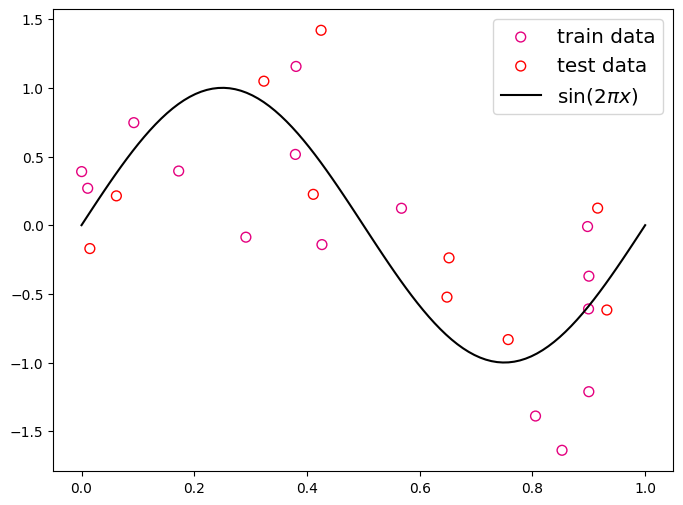

In [170]:
# 生成数据
func = sin
interval = (0,1)
train_num = 15
test_num = 10
noise = 0.5 #0.1 
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise = noise)
X_test, y_test = create_toy_data(func=func, interval=interval, sample_num=test_num, noise = noise)

X_underlying = paddle.linspace(interval[0],interval[1],num=100)
y_underlying = sin(X_underlying)

# 绘制图像
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
plt.scatter(X_test, y_test, facecolor="none", edgecolor="r", s=50, label="test data")
# plt.plot(X_underlying.cpu().numpy(), y_underlying.cpu().numpy(), c='#000000', label=r"underlying distribution")

plt.plot(X_underlying.cpu().numpy(), y_underlying.cpu().numpy(), c='#000000', label=r"$\sin(2\pi x)$")
plt.legend(fontsize='x-large')
plt.savefig('ml-vis2.pdf')
plt.show()

在输出结果中，绿色的曲线是周期为 1 的 $sin$ 函数曲线，蓝色的圆圈为生成的训练样本数据，红色的圆圈为生成的测试样本数据。

### 3.2 模型构建
通过多项式的定义可以看出，多项式回归和线性回归一样，同样学习参数$\boldsymbol{w}$，只不过需要对输入特征$\phi(x)$根据多项式阶数进行变换。因此，我们可以套用求解线性回归参数的方法来求解多项式回归参数。

首先，我们实现**多项式基函数**`polynomial_basis_function`对原始特征$x$进行转换。

In [171]:
# 多项式转换


def polynomial_basis_function(x, degree = 2):
    """
    输入：
       - x: tensor, 输入的数据，shape=[N,1]
       - degree: int, 多项式的阶数
       example Input: [[2], [3], [4]], degree=2
       example Output: [[2^1, 2^2], [3^1, 3^2], [4^1, 4^2]]
       注意：本案例中,在degree>=1时不生成全为1的一列数据；degree为0时生成形状与输入相同，全1的Tensor
    输出：
       - x_result： tensor
    """
    if degree==0:
        return paddle.ones(shape = x.shape,dtype='float32') 

    x_tmp = x
    x_result = x_tmp

    for i in range(2, degree+1):
        x_tmp = paddle.multiply(x_tmp,x) # 逐元素相乘
        x_result = paddle.concat((x_result,x_tmp),axis=-1)

    return x_result

# 简单测试
data = [[2], [3], [4]]
X = paddle.to_tensor(data = data,dtype='float32')
degree = 3
transformed_X = polynomial_basis_function(X,degree=degree)
print("转换前：",X)
print("阶数为",degree,"转换后：",transformed_X)

转换前： Tensor(shape=[3, 1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[2.],
        [3.],
        [4.]])
阶数为 3 转换后： Tensor(shape=[3, 3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[2. , 4. , 8. ],
        [3. , 9. , 27.],
        [4. , 16., 64.]])


### 3.3 模型训练

对于多项式回归，我们可以同样使用前面线性回归中定义的`LinearRegression`算子、训练函数`train`、均方误差函数`mean_squared_error`。拟合训练数据的目标是最小化损失函数，同线性回归一样，也可以通过矩阵运算直接求出$\boldsymbol{w}$的值。

我们设定不同的多项式阶，$M$的取值分别为0、1、3、8，之前构造的训练集上进行训练，观察样本数据对$\sin$曲线的拟合结果。

{'w': Tensor(shape=[1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [0.]), 'b': Tensor(shape=[], dtype=float32, place=Place(cpu), stop_gradient=True,
       -0.12447164)}
{'w': Tensor(shape=[1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [-1.64536881]), 'b': Tensor(shape=[1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [0.70672762])}
{'w': Tensor(shape=[3], dtype=float32, place=Place(cpu), stop_gradient=True,
       [ 5.76256323 , -19.40506554,  13.06057930]), 'b': Tensor(shape=[1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [0.23789382])}
{'w': Tensor(shape=[8], dtype=float32, place=Place(cpu), stop_gradient=True,
       [ 2.90756488  ,  2.09338880  , -109.33370972,  383.54489136,
        -430.56143188, -23.42043877 ,  241.27394104, -60.61398315 ]), 'b': Tensor(shape=[1], dtype=float32, place=Place(cpu), stop_gradient=True,
       [0.37036631])}


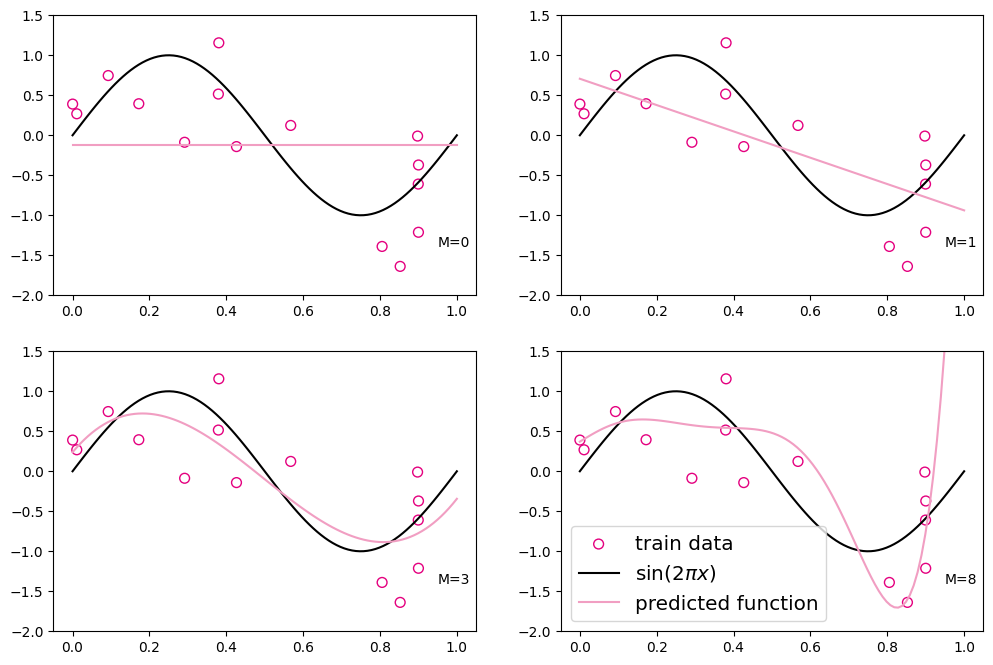

In [172]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

for i, degree in enumerate([0, 1, 3, 8]): # []中为多项式的阶数
    model = Linear(degree)
    X_train_transformed = polynomial_basis_function(X_train.reshape([-1,1]), degree)
    X_underlying_transformed = polynomial_basis_function(X_underlying.reshape([-1,1]), degree)
    
    model = optimizer_lsm(model,X_train_transformed,y_train.reshape([-1,1])) #拟合得到参数

    y_underlying_pred = model(X_underlying_transformed).squeeze()

    print(model.params)
    
    # 绘制图像
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
    plt.plot(X_underlying.cpu().numpy(), y_underlying.cpu().numpy(), c='#000000', label=r"$\sin(2\pi x)$")
    
    plt.plot(X_underlying.cpu().numpy(), y_underlying_pred.cpu().numpy(), c='#f19ec2', label="predicted function")
    plt.ylim(-2, 1.5)
    plt.annotate("M={}".format(degree), xy=(0.95, -1.4))

#plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.legend(loc='lower left', fontsize='x-large')
plt.savefig('ml-vis3.pdf')
plt.show()

观察可视化结果，红色的曲线表示不同阶多项式分布拟合数据的结果：
* 当 $M=0$ 或 $M=1$ 时，拟合曲线较简单，模型欠拟合；
* 当 $M=8$ 时，拟合曲线较复杂，模型过拟合；
* 当 $M=3$ 时，模型拟合最为合理。

### 3.4 模型评估

下面通过均方误差来衡量训练误差、测试误差以及在没有噪音的加入下`sin`函数值与多项式回归值之间的误差，更加真实地反映拟合结果。多项式分布阶数从0到8进行遍历。

train errors: 
 [0.5963446497917175, 0.28960028290748596, 0.26379573345184326, 0.2311105728149414, 0.17822028696537018, 0.1384272277355194, 0.16120733320713043, 0.2630428075790405, 0.16810289025306702]
test errors: 
 [0.49752944707870483, 0.4701949656009674, 0.3896386921405792, 0.3042615056037903, 0.29499441385269165, 0.3911464214324951, 0.3186322748661041, 0.6302573084831238, 0.32993221282958984]


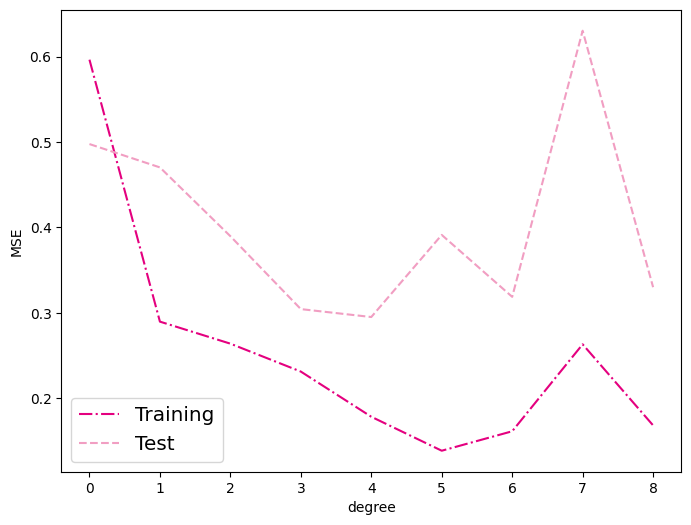

In [173]:
# 训练误差和测试误差
training_errors = []
test_errors = []
distribution_errors = []

# 遍历多项式阶数
for i in range(9):
    model = Linear(i)

    X_train_transformed = polynomial_basis_function(X_train.reshape([-1,1]), i) 
    X_test_transformed = polynomial_basis_function(X_test.reshape([-1,1]), i) 
    X_underlying_transformed = polynomial_basis_function(X_underlying.reshape([-1,1]), i)
    
    optimizer_lsm(model,X_train_transformed,y_train.reshape([-1,1]))
    
    y_train_pred = model(X_train_transformed).squeeze()
    y_test_pred = model(X_test_transformed).squeeze()
    y_underlying_pred = model(X_underlying_transformed).squeeze()

    train_mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred).item()
    training_errors.append(train_mse)

    test_mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred).item()
    test_errors.append(test_mse)

    #distribution_mse = mean_squared_error(y_true=y_underlying, y_pred=y_underlying_pred).item()
    #distribution_errors.append(distribution_mse)

print ("train errors: \n",training_errors)
print ("test errors: \n",test_errors)
#print ("distribution errors: \n", distribution_errors)

# 绘制图片
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(training_errors, '-.', mfc="none", mec='#e4007f', ms=10, c='#e4007f', label="Training")
plt.plot(test_errors, '--', mfc="none", mec='#f19ec2', ms=10, c='#f19ec2', label="Test")
#plt.plot(distribution_errors, '-', mfc="none", mec="#3D3D3F", ms=10, c="#3D3D3F", label="Distribution")
plt.legend(fontsize='x-large')
plt.xlabel("degree")
plt.ylabel("MSE")
plt.savefig('ml-mse-error.pdf')
plt.show()

观察可视化结果：
* 当阶数较低的时候，模型的表示能力有限，训练误差和测试误差都很高，代表模型欠拟合；
* 当阶数较高的时候，模型表示能力强，但将训练数据中的噪声也作为特征进行学习，一般情况下训练误差继续降低而测试误差显著升高，代表模型过拟合。
> 此处多项式阶数大于等于5时，训练误差并没有下降，尤其是在多项式阶数为7时，训练误差变得非常大，请思考原因？提示：请从幂函数特性角度思考。

对于模型过拟合的情况，可以引入正则化方法，通过向误差函数中添加一个**惩罚项**来避免系数倾向于较大的取值。下面加入$\mathcal{l_{2}}$正则化项，查看拟合结果。

mse: 0.32993221282958984
mse_with_l2_reg: 0.3266444802284241


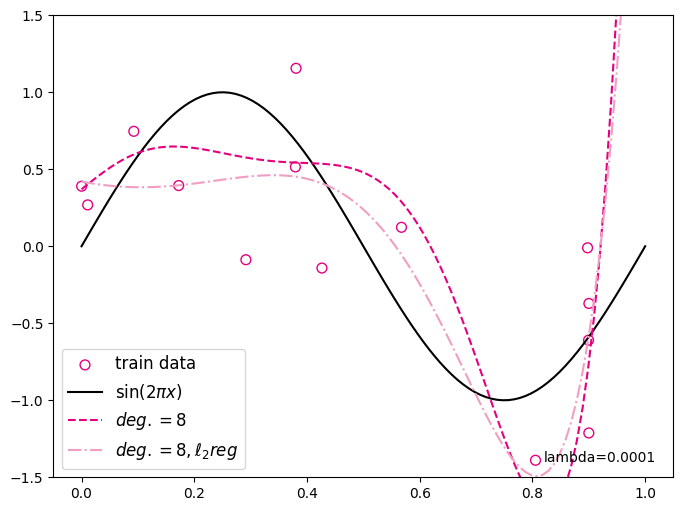

In [174]:
degree = 8 # 多项式阶数
reg_lambda = 0.0001 # 正则化系数

X_train_transformed = polynomial_basis_function(X_train.reshape([-1,1]), degree)
X_test_transformed = polynomial_basis_function(X_test.reshape([-1,1]), degree)
X_underlying_transformed = polynomial_basis_function(X_underlying.reshape([-1,1]), degree)

model = Linear(degree) 

optimizer_lsm(model,X_train_transformed,y_train.reshape([-1,1]))

y_test_pred=model(X_test_transformed).squeeze()
y_underlying_pred=model(X_underlying_transformed).squeeze()

model_reg = Linear(degree) 

optimizer_lsm(model_reg,X_train_transformed,y_train.reshape([-1,1]),reg_lambda=reg_lambda)

y_test_pred_reg=model_reg(X_test_transformed).squeeze()
y_underlying_pred_reg=model_reg(X_underlying_transformed).squeeze()

mse = mean_squared_error(y_true = y_test, y_pred = y_test_pred).item()
print("mse:",mse)
mes_reg = mean_squared_error(y_true = y_test, y_pred = y_test_pred_reg).item()
print("mse_with_l2_reg:",mes_reg)

# 绘制图像
plt.scatter(X_train, y_train, facecolor="none", edgecolor="#e4007f", s=50, label="train data")
plt.plot(X_underlying.cpu().numpy(), y_underlying.cpu().numpy(), c='#000000', label=r"$\sin(2\pi x)$")
plt.plot(X_underlying.cpu().numpy(), y_underlying_pred.cpu().numpy(), c='#e4007f', linestyle="--", label="$deg. = 8$")
plt.plot(X_underlying.cpu().numpy(), y_underlying_pred_reg.cpu().numpy(), c='#f19ec2', linestyle="-.", label="$deg. = 8, \ell_2 reg$")
plt.ylim(-1.5, 1.5)
plt.annotate("lambda={}".format(reg_lambda), xy=(0.82, -1.4))
plt.legend(fontsize='large')
plt.savefig('ml-vis4.pdf')
plt.show()

观察可视化结果，其中黄色曲线为加入$\mathcal{l_{2}}$正则后多项式分布拟合结果，红色曲线为未加入$\mathcal{l_{2}}$正则的拟合结果，黄色曲线的拟合效果明显好于红色曲线。

## 思考

如果训练数据中存在一些异常样本，会对最终模型有何影响？怎样处理可以尽可能减少异常样本对模型的影响？

简要回答：异常样本通常与正常样本有较大的差距，会影响模型的学习，导致错误拟合，性能下降。
        处理方法：1.通常异常样本与正常样本差距较大，可能可以通过手动挑出。2.如果数据较多，可以通过设定一个较小区间段，从总的数据中按某一方向剔除该区间大小的数据，获得尽可能多的总数据进行模拟，最后将其综合。